In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.transforms import Bbox


In [9]:
df = pd.read_csv("combined_results.csv")

metric = "Accuracy"
df = df[df["metric"] == metric]
#df = df[df['suite_id'] == 336]

splits = [s for s in df["split_method"].unique() if s.lower() != "random_split"]
 
method_order = [
    'ConstantPredictor', 'LogisticRegressor' , 'RandomForestClassifier', 'RandomForestRegressor', 'LGBMClassifier', 'LGBMRegressor',
    'Engression', 'MLP', 'ResNet', 'FTTransformer', 'DGBT', 'DRF'
]
rename_map = {
    'RandomForestClassifier': 'Random Forest',
    'RandomForestRegressor': 'Random Forest',
    'LGBMClassifier': 'Boosted Trees',
    'LGBMRegressor': 'Boosted Trees',
    'FTTransformer': 'FT-Transformer',
    'LogisticRegressor': 'Logistic Regression',
}

# 3) Extract unique suites, metrics, and extrapolation methods
suites  = df['suite_id'].unique()
metrics = df['metric'].unique()
methods = df['split_method'].unique()

Split 'umap_split': baseline Accuracy per task:
 task_id
361055    0.779000
361060    0.823500
361061    0.800000
361062    0.993500
361063    0.880500
361065    0.909500
361066    0.794000
361068    0.953000
361069    0.706500
361070    0.576873
361110    0.751000
361111    0.590013
361113    0.708500
361273    0.597000
361274    0.794000
361275    0.722000
361276    0.721980
361277    0.870500
361278    0.710000
361282    0.672000
361283    0.712000
361285    0.767000
361286    0.711268
dtype: float64
Split 'umap_split': overall highest Accuracy = 0.9935



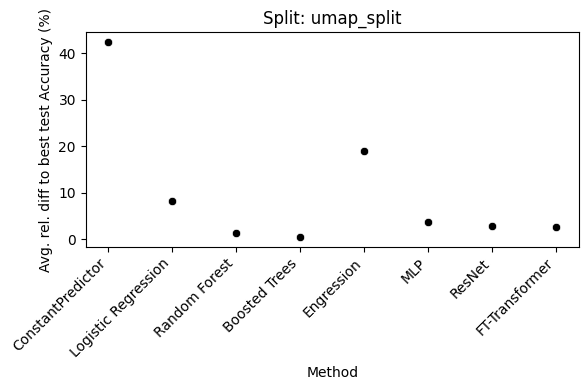

Split 'kmedoids_split': baseline Accuracy per task:
 task_id
361110    0.805814
361111    0.619755
361113    0.782316
361282    0.679885
361283    0.797521
361285    0.774464
361286    0.698154
dtype: float64
Split 'kmedoids_split': overall highest Accuracy = 0.805813953



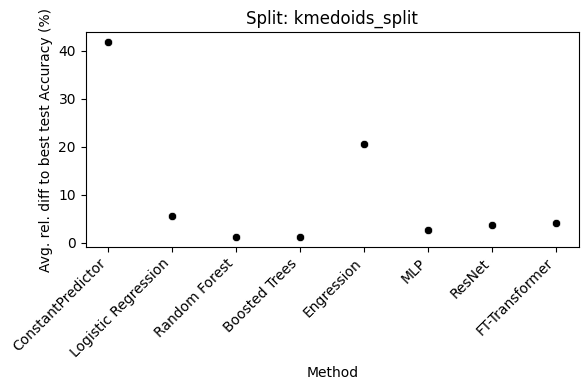

Split 'gower_split': baseline Accuracy per task:
 task_id
361110    0.843000
361111    0.664258
361113    0.795000
361282    0.684000
361283    0.786000
361285    0.776000
361286    0.701807
dtype: float64
Split 'gower_split': overall highest Accuracy = 0.843



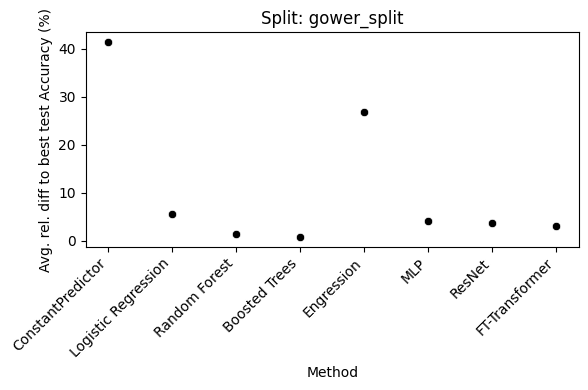

Split 'mahalanobis_split': baseline Accuracy per task:
 task_id
361055    0.766000
361060    0.828000
361061    0.834500
361062    0.996500
361063    0.843000
361065    0.935000
361066    0.864500
361068    0.922000
361069    0.706500
361070    0.633377
361273    0.640500
361274    0.792000
361275    0.737000
361276    0.703057
361277    0.886500
361278    0.752000
dtype: float64
Split 'mahalanobis_split': overall highest Accuracy = 0.9965



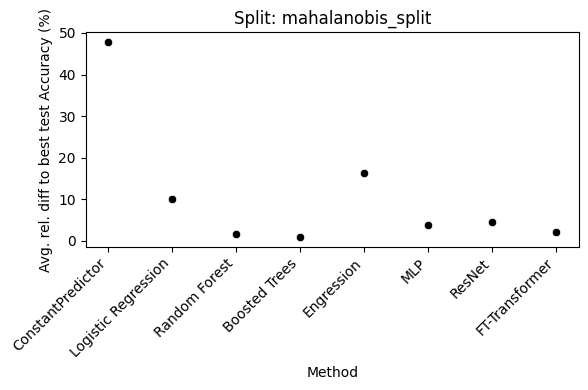

Split 'kmeans_split': baseline Accuracy per task:
 task_id
361055    0.772396
361060    0.876425
361061    0.829630
361062    0.989919
361063    0.846050
361065    0.908841
361066    0.831664
361068    0.935321
361069    0.739082
361070    0.633939
361273    0.639450
361274    0.790544
361275    0.808380
361276    0.746121
361277    0.902071
361278    0.707493
dtype: float64
Split 'kmeans_split': overall highest Accuracy = 0.989919355



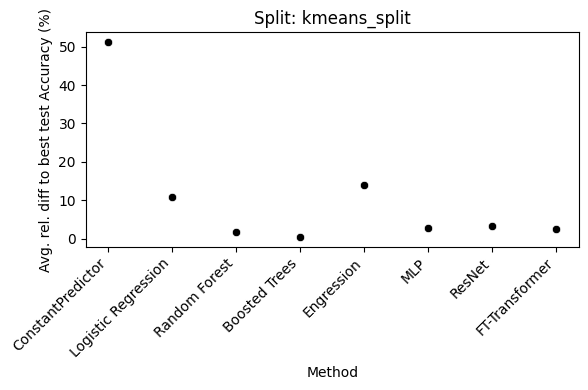

Split 'spatial_depth_split': baseline Accuracy per task:
 task_id
361055    0.765500
361060    0.837000
361061    0.843000
361062    0.995000
361063    0.842000
361065    0.935000
361066    0.857500
361068    0.926500
361069    0.717000
361070    0.642576
361273    0.637000
361274    0.797500
361275    0.719000
361276    0.689956
361277    0.885500
361278    0.748500
dtype: float64
Split 'spatial_depth_split': overall highest Accuracy = 0.995



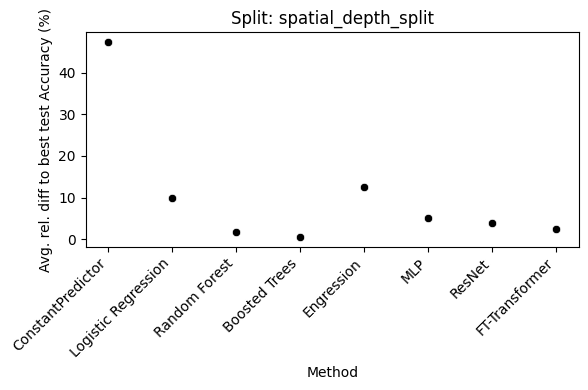

In [10]:
outdir = os.path.join('PICTURES', metric.lower())
os.makedirs(outdir, exist_ok=True)

for split in splits:
    sub = df[df["split_method"] == split]
    if sub.empty:
        continue

    table = sub.pivot(
        index="model",
        columns="task_id",
        values="value"
    )

    baseline = table.max(axis=0)
    print(f"Split '{split}': baseline Accuracy per task:\n", baseline)
    print(f"Split '{split}': overall highest Accuracy = {baseline.max()}\n")

    rel = (baseline - table) / baseline

    summary = pd.DataFrame({
        "Mean": rel.mean(axis=1),
        "Median": rel.median(axis=1),
        "Std": rel.std(axis=1)
    }).reset_index().rename(columns={"model": "Method"})

    summary["Method"] = pd.Categorical(
        summary["Method"],
        categories=method_order,
        ordered=True
    )
    summary = summary.sort_values("Method")
    summary["Method"] = summary["Method"].astype(str).map(rename_map).fillna(summary["Method"].astype(str))

    summary["Mean"] = 100 * summary["Mean"]

    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=summary, x="Method", y="Mean", color='black')
    plt.xlabel("Method")
    plt.ylabel("Avg. rel. diff to best test Accuracy (%)")
    plt.title(f"Split: {split}")
  
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    fname = f"{split}_relative_diff_{metric}.png"
    plt.savefig(os.path.join(outdir, fname), bbox_inches='tight')
    plt.show()




In [4]:
df = df[df["metric"] == "Accuracy"]

df = df[df["split_method"] != "random_split"]


=== RAW relative_difference sample ===
      split_method  task_id                   model     value  baseline  \
4       umap_split   361110       LogisticRegressor  0.693000  0.751000   
6       umap_split   361110       ConstantPredictor  0.474000  0.751000   
8   kmedoids_split   361110       LogisticRegressor  0.722674  0.805814   
10  kmedoids_split   361110       ConstantPredictor  0.417442  0.805814   
12     gower_split   361110       LogisticRegressor  0.782000  0.843000   
14     gower_split   361110       ConstantPredictor  0.419000  0.843000   
24     gower_split   361110              Engression  0.422000  0.843000   
27     gower_split   361110                     MLP  0.793500  0.843000   
29     gower_split   361110                  ResNet  0.783000  0.843000   
31     gower_split   361110           FTTransformer  0.791500  0.843000   
32  kmedoids_split   361110              Engression  0.443605  0.805814   
35  kmedoids_split   361110                     MLP  0.72383

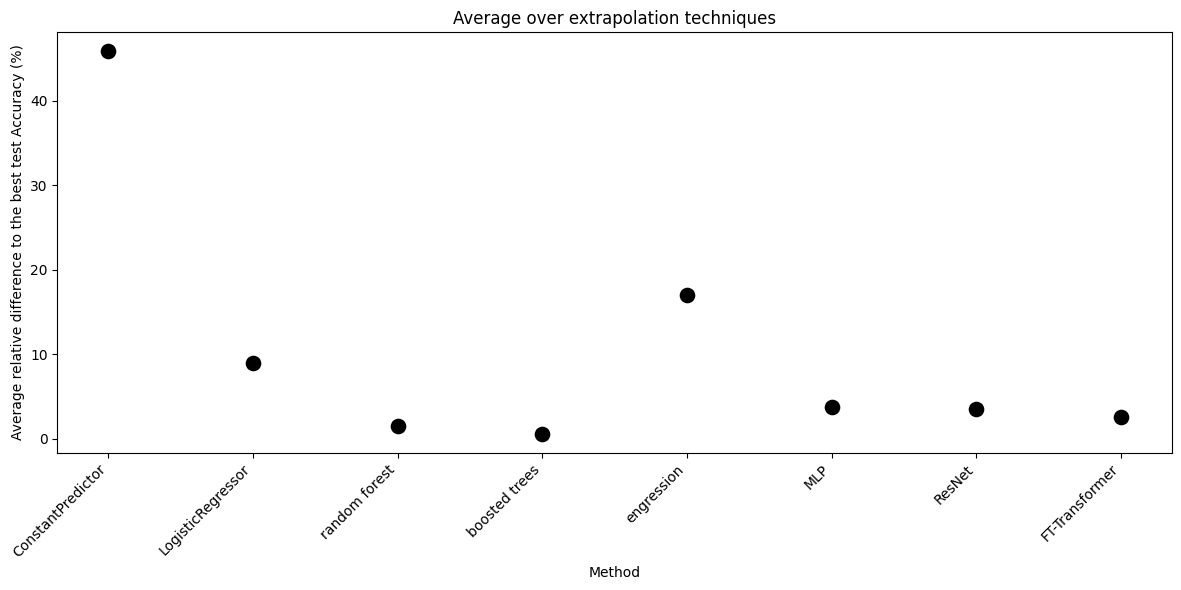

In [ ]:
df["baseline"] = (
    df
    .groupby(["split_method", "task_id"])["value"]
    .transform("max")
)

df["relative_difference"] = (df["baseline"] - df["value"]) / df["baseline"]

print("\n=== RAW relative_difference sample ===")
print(df[['split_method','task_id','model','value','baseline','relative_difference']].head(20))

print("\n=== per-model relative_difference summary ===")
print(df.groupby('model')['relative_difference']
        .agg(count='count', mean='mean', min='min', max='max')
        .sort_values('mean', ascending=False)
     )

print("\n=== model appearance counts ===")
print(df.groupby('model')['relative_difference']
        .count()
        .sort_values(ascending=False)
     )


overall = (
    df
    .groupby('model')['relative_difference']
    .mean()
    .reset_index(name='Mean')
)
overall['Mean'] *= 100  # to percent

method_order = [
    'ConstantPredictor', 'LogisticRegressor',
    'RandomForestClassifier', 'RandomForestRegressor',
    'LGBMClassifier', 'LGBMRegressor', 'Engression',
    'MLP', 'ResNet', 'FTTransformer', 'DGBT', 'DRF'
]
overall = overall.set_index('model').reindex(method_order).reset_index()

rename_map = {
    'RandomForestClassifier':'random forest',
    'RandomForestRegressor':'random forest',
    'LGBMClassifier':       'boosted trees',
    'LGBMRegressor':        'boosted trees',
    'Engression':           'engression',
    'MLP':                  'MLP',
    'ResNet':               'ResNet',
    'FTTransformer':        'FT-Transformer',
    'DGBT':                 'DGBT',
    'DRF':                  'DRF',
}
overall['Method'] = overall['model'].map(rename_map).fillna(overall['model'])


plt.figure(figsize=(12,6))
sns.scatterplot(data=overall, x='Method', y='Mean', color='black', s=150)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average relative difference to the best test Accuracy (%)')
plt.xlabel('Method')
plt.title('Average over extrapolation techniques')

plt.tight_layout()

os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/average_over_extrapolation_techniques_Accuracy.png', bbox_inches='tight')
plt.show()
